In [1]:
import pandas as pd 
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("Cleaned_Forest_Fire.csv")

In [3]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0


In [4]:
df.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.563786
std,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.496938
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,1.000000
75%,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [7]:
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216


<Axes: >

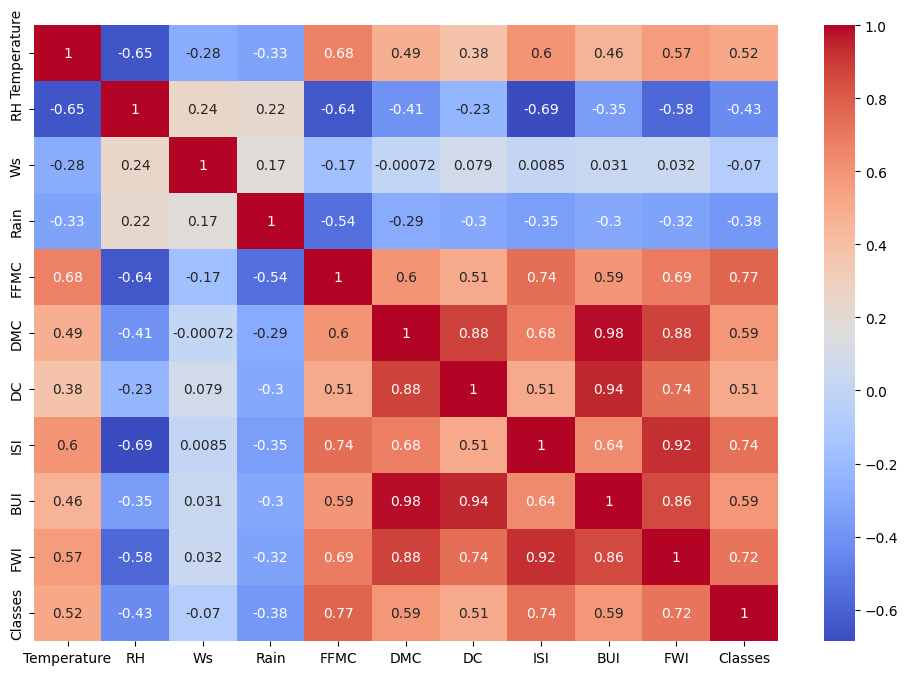

In [8]:
plt.figure(figsize=(12,8))
sb.heatmap(df.corr() , annot= True ,cmap='coolwarm')

## Regression

In [9]:
# Splitting dataset

In [10]:
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes'],
      dtype='object')

In [11]:
X = df.drop('FWI' , axis= 1)
y = df['FWI']



In [12]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.33 , random_state= 42)

### Feature Selection

<Axes: >

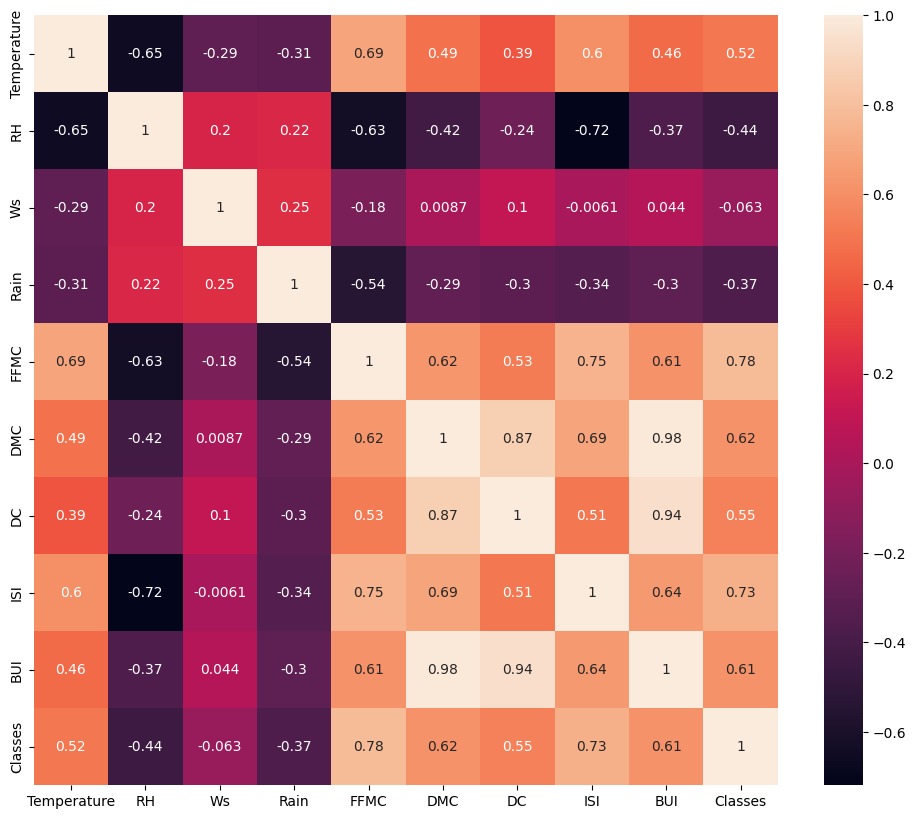

In [13]:
# Check for multiCollinearity
plt.figure(figsize = (12,10))
corr = X_train.corr()
sb.heatmap(corr , annot= True)

In [14]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes
Temperature,1.000000,-0.653217,-0.294493,-0.306845,0.686784,0.485957,0.387369,0.600649,0.463775,0.515616
RH,-0.653217,1.000000,0.200772,0.218350,-0.633803,-0.416955,-0.240523,-0.718725,-0.365222,-0.444497
Ws,-0.294493,0.200772,1.000000,0.247112,-0.178626,0.008702,0.101059,-0.006136,0.043700,-0.062682
Rain,-0.306845,0.218350,0.247112,1.000000,-0.537842,-0.288821,-0.304050,-0.340753,-0.300830,-0.366668
FFMC,0.686784,-0.633803,-0.178626,-0.537842,1.000000,0.624492,0.528396,0.748319,0.611220,0.782922
DMC,0.485957,-0.416955,0.008702,-0.288821,0.624492,1.000000,0.869090,0.685568,0.983366,0.617266
DC,0.387369,-0.240523,0.101059,-0.304050,0.528396,0.869090,1.000000,0.514349,0.942305,0.547390
ISI,0.600649,-0.718725,-0.006136,-0.340753,0.748319,0.685568,0.514349,1.000000,0.643968,0.733342
BUI,0.463775,-0.365222,0.043700,-0.300830,0.611220,0.983366,0.942305,0.643968,1.000000,0.613711
Classes,0.515616,-0.444497,-0.062682,-0.366668,0.782922,0.617266,0.547390,0.733342,0.613711,1.000000


In [15]:
def correlation(dataset , threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i , j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return  col_corr            

In [16]:
# Adding threshold and checking columns with multicolinearity
corr_features = correlation(X_train , 0.85)

In [17]:
corr_features

{'BUI', 'DC'}

In [18]:
# Dropping the col which persudes multicollinearity
X_train.drop(corr_features , axis=1 , inplace = True)
X_test.drop(corr_features , axis=1 , inplace = True)
X_train.shape,X_test.shape

((162, 8), (81, 8))

### Insights 
- We will not drop any columns

## Feature Scaling Or Standardization

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
X_train_scaled

array([[-1.12656349,  1.2199876 , -0.22762867, ..., -0.19749796,
        -0.11433646,  0.90566259],
       [ 0.52256258,  0.1473255 , -0.98795537, ..., -0.3124764 ,
         0.09352209,  0.90566259],
       [ 0.24770824,  0.34844965, -0.22762867, ...,  0.66867301,
         0.09352209,  0.90566259],
       ...,
       [-1.95112653,  0.88478069,  0.53269803, ..., -1.06366892,
        -1.06124763, -1.10416397],
       [ 0.52256258, -0.25492278,  0.15253468, ...,  0.3314029 ,
         0.60162077,  0.90566259],
       [-0.5768548 ,  0.95182207,  2.05335143, ..., -1.01767754,
        -0.85338908, -1.10416397]])

## Box Plots To Understand Effect of Standard Scaler

Text(0.5, 1.0, 'X_train After Scaling')

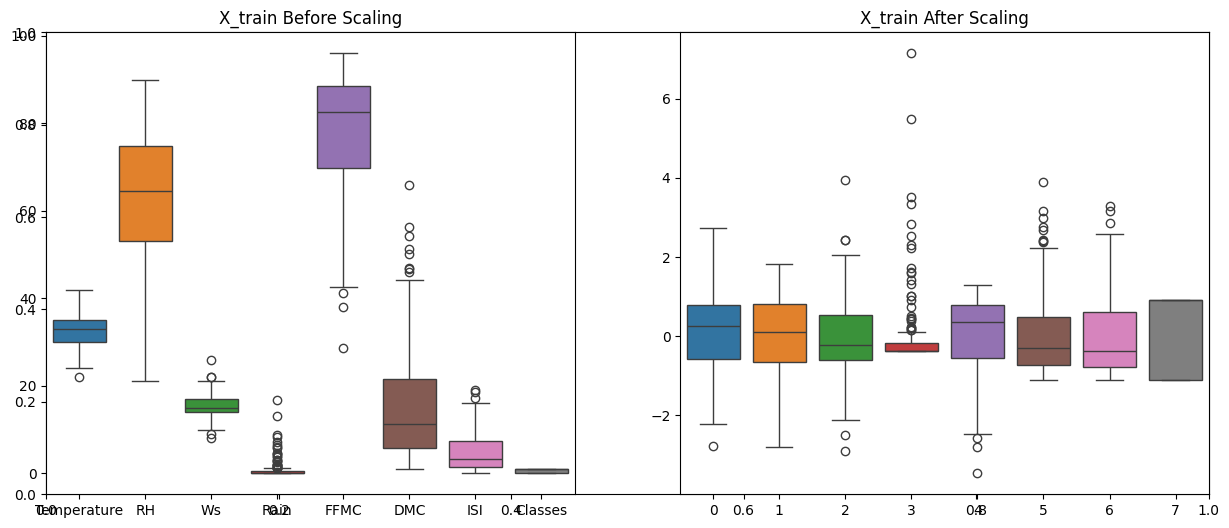

In [21]:
plt.subplots(figsize=(15 , 6))
plt.subplot(1,2,1)
sb.boxplot(data = X_train)
plt.title('X_train Before Scaling')
plt.subplot(1,2,2)
sb.boxplot(data = X_train_scaled)
plt.title('X_train After Scaling')

## Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg = LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred = linreg.predict(X_test_scaled)
mae = mean_absolute_error(y_test , y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolute error" , mae)
print("R2 Score" , score)

Mean absolute error 0.5789903212479736
R2 Score 0.9822521574729719


## Lasso Regression

In [23]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso = Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test , y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolute error" , mae)
print("R2 Score" , score)

Mean absolute error 1.1053469612945104
R2 Score 0.9514102148198663


## Ridge Regression

In [24]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge = Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test , y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolute error" , mae)
print("R2 Score" , score)

Mean absolute error 0.5981649408710665
R2 Score 0.9816192129343663


## Elastic Net Regression

In [25]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic = ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred = elastic.predict(X_test_scaled)
mae = mean_absolute_error(y_test , y_pred)
score = r2_score(y_test,y_pred)
print("Mean absolute error" , mae)
print("R2 Score" , score)

Mean absolute error 1.8345454074467984
R2 Score 0.8825431866810243


## Pickle 

In [26]:
import pickle
pickle.dump(scaler , open('scaler.pkl' , 'wb'))
pickle.dump(ridge , open('regressor.pkl' , 'wb'))